<a href="https://www.kaggle.com/code/anjusukumaran4/time-series-analysis-air-passengers?scriptVersionId=150622748" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10,6

## Load Data

In [2]:
df = pd.read_csv("/kaggle/input/air-passengers/AirPassengers.csv")

## Data Exploration

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
#parse string to datetime type
from datetime import datetime
df['Month'] = pd.to_datetime(df['Month'])

In [6]:
#to set month column as index
indexed_df = df.set_index(['Month'])

In [7]:
indexed_df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


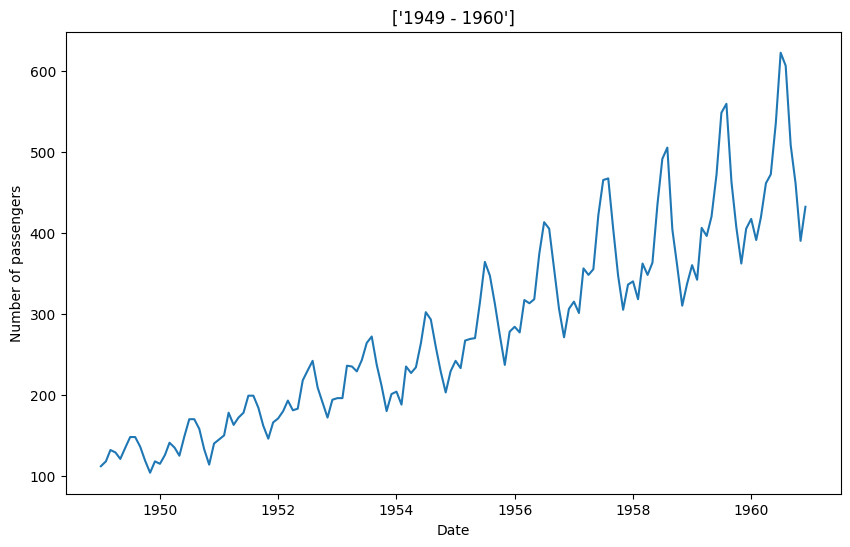

In [8]:
#plotting
plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.title(['1949 - 1960'])
plt.plot(indexed_df)

## Stationarity
Time series data are generally characterized by their temporal nature. This temporal nature adds a trend or seasonality to the data that makes it compatible for time series analysis and forecasting. 

Time-series data is said to be stationary if it doesn’t change with time or if they don’t have a temporal structure. that is  a stationary series is one whose statistical properties such as mean, variance, covariance, and standard deviation do not vary with time, or these stats properties are not a function of time. In other words, stationarity in Time Series also means series without a Trend or Seasonal components. So, it is highly necessary to check if the data is stationary. In time series forecasting, we cannot derive valuable insights from data if it is stationary.

### To check the stationarity

1. Using rolling statistics

Plotting rolling statistics is a visual technique to check the statinarity of time series dataset. That is rolling analysis of a time series model is used to assess the model’s stability over time. In statistics, a moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different selections of the full data set. 

Pandas rolling() function gives the element of moving window counts. It creates a rolling window object that can be used to apply a function to a specific number of periods at a time. The rolling() function takes a window size parameter that defines the number of periods to include in each rolling window.

In [9]:
rolmean = indexed_df.rolling(window = 12).mean()    #window of 12 months to get the rolling mean on yearly level

rolstd = indexed_df.rolling(window = 12).std()

print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

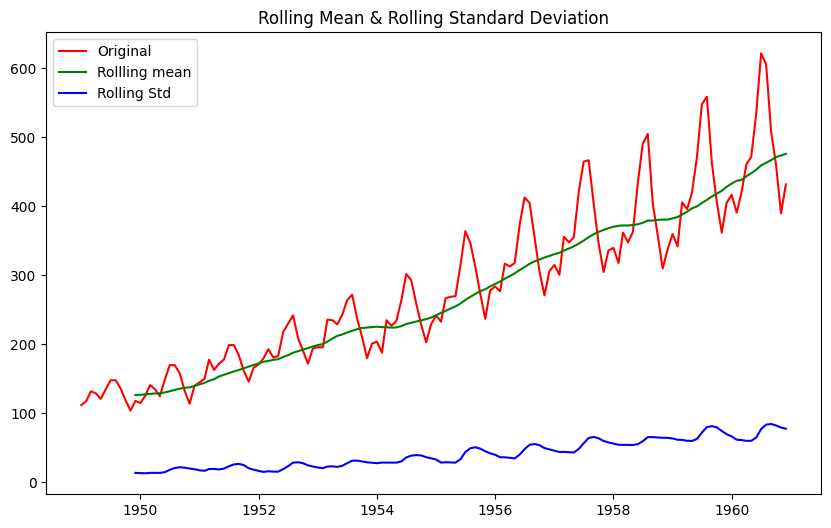

In [10]:
#plot rolling statistics
original = plt.plot(indexed_df, color = 'red', label = 'Original')
mean = plt.plot(rolmean, color = 'green', label = 'Rollling mean')
std = plt.plot(rolstd, color = 'blue', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show

From the plot we can see that mean and std is not constant so the data is not stationary

2. Using Dickey - Fuller test

The Dickey-Fuller test is a statistical test that is used to test for the presence of a unit root in a time series dataset. The null hypothesis of the test is that there is a unit root in the time series, which implies that the series is non-stationary and has a trend.

If the test statistic is more negative than the critical value, you can reject the null hypothesis and conclude that the time series is stationary. If the test statistic is less negative than the critical value, you cannot reject the null hypothesis and conclude that the time series has a unit root. Since the null hypothesis assumes the presence of a unit root, the p-value obtained by the test should be less than the significance level (say 0.05) to reject the null hypothesis. ie:

p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [11]:
from statsmodels.tsa.stattools import adfuller

print('Result of Dickey - Fuller Test : ')

dftest = adfuller(indexed_df ['#Passengers'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p_value','#Lags Used','Number of Observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s) '%key] = value
    
print(dfoutput) 

Result of Dickey - Fuller Test : 
Test statistic                  0.815369
p_value                         0.991880
#Lags Used                     13.000000
Number of Observation Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


Here we have a very large p-value so that data is not stationary

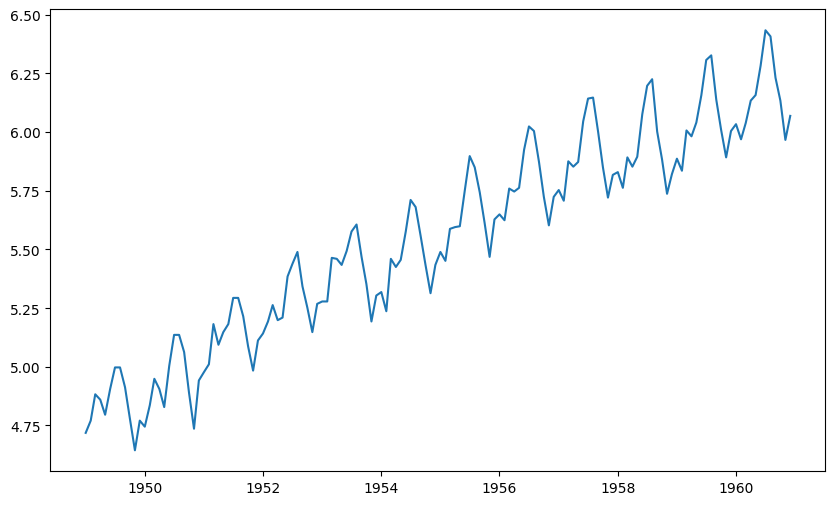

In [12]:
#estimating trend
#taken a log of the index dataset
indexed_df_logscale = np.log(indexed_df)
plt.plot(indexed_df_logscale)

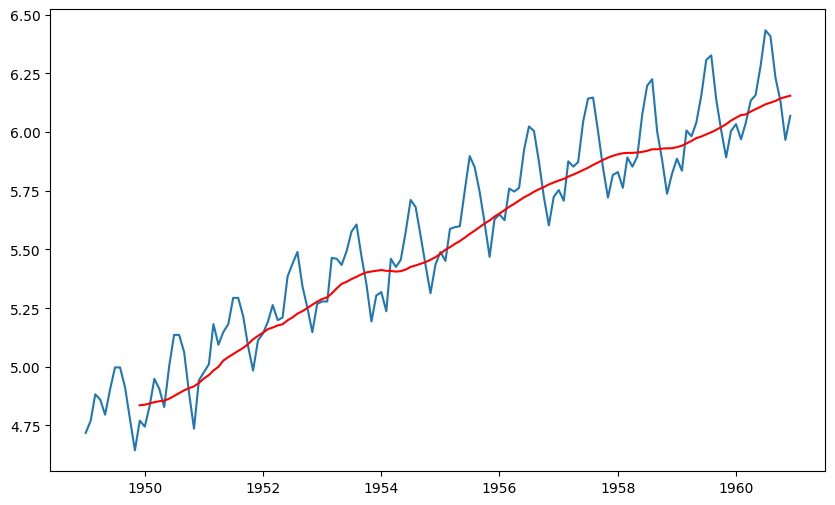

In [13]:
#to find the moving average using log value of dataset
moving_average = indexed_df_logscale.rolling(window=12).mean()
moving_std = indexed_df_logscale.rolling(window=12).std()
plt.plot(indexed_df_logscale)
plt.plot(moving_average, color = 'red')

again it is not stationary, lets try another way

In [14]:
df_logscale_minus_moving_avg = indexed_df_logscale - moving_average
df_logscale_minus_moving_avg.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


In [15]:
#remove nan values
df_logscale_minus_moving_avg.dropna(inplace=True)
df_logscale_minus_moving_avg.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


Lets define a function to check whether a time series is stationary or not

In [16]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    #determine rolling statistics
    moving_average = timeseries.rolling(window = 12).mean()
    moving_std = timeseries.rolling(window = 12).std()
    
    #plot rolling statistics
    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(moving_average, color = 'green', label = 'Rolling Mean')
    std = plt.plot(moving_std, color = 'red', label = 'Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Rolling Std')
    plt.show()
    
    #Dickey-Fuller test
    print('Result of Dickey-fuller test : ')
    dftest = adfuller(timeseries['#Passengers'], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statistics','p-value','#Lags used','Number of observation used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s) '%key] = value
    print(dfoutput)    

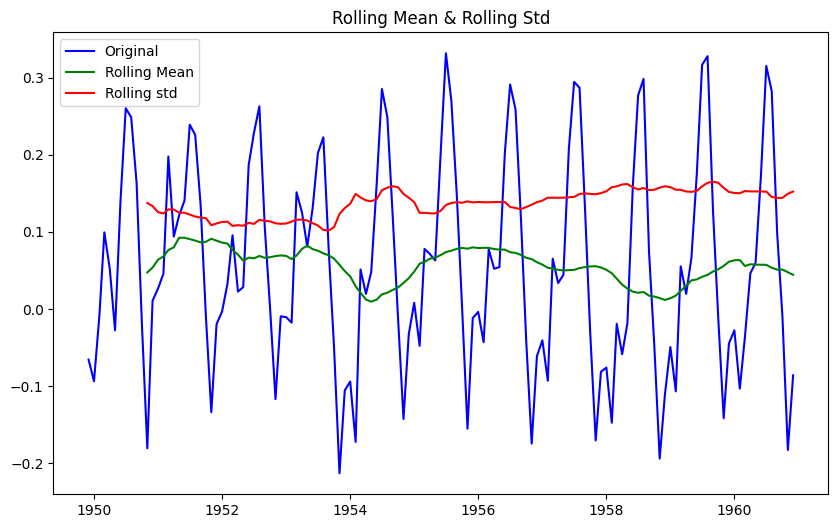

Result of Dickey-fuller test : 
Test statistics                -3.162908
p-value                         0.022235
#Lags used                     13.000000
Number of observation used    119.000000
Critical value (1%)            -3.486535
Critical value (5%)            -2.886151
Critical value (10%)           -2.579896
dtype: float64


In [17]:
test_stationarity(df_logscale_minus_moving_avg)

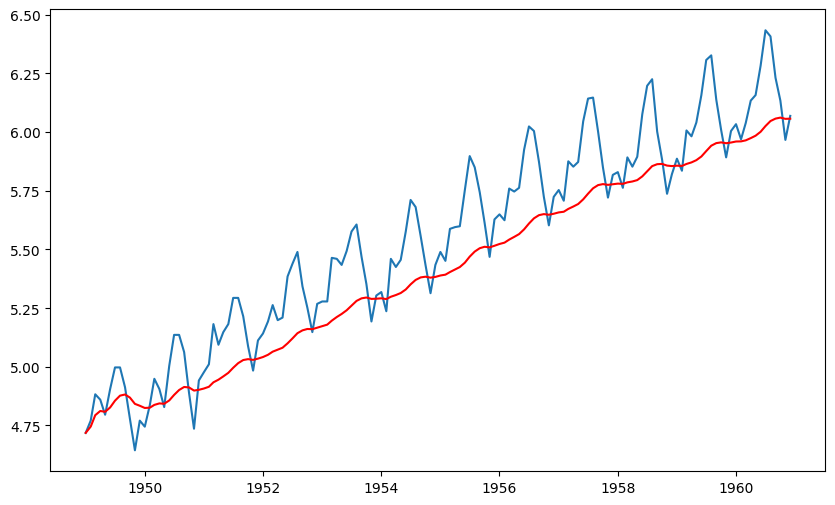

In [18]:
#inorder to see the trend present inside a time series
exponential_Decay_weighted_avg = indexed_df_logscale.ewm(halflife = 12,min_periods = 0,adjust=True).mean()
plt.plot(indexed_df_logscale)
plt.plot(exponential_Decay_weighted_avg,color='red')

Here is the trend is upward and keep increasing with respect to time 

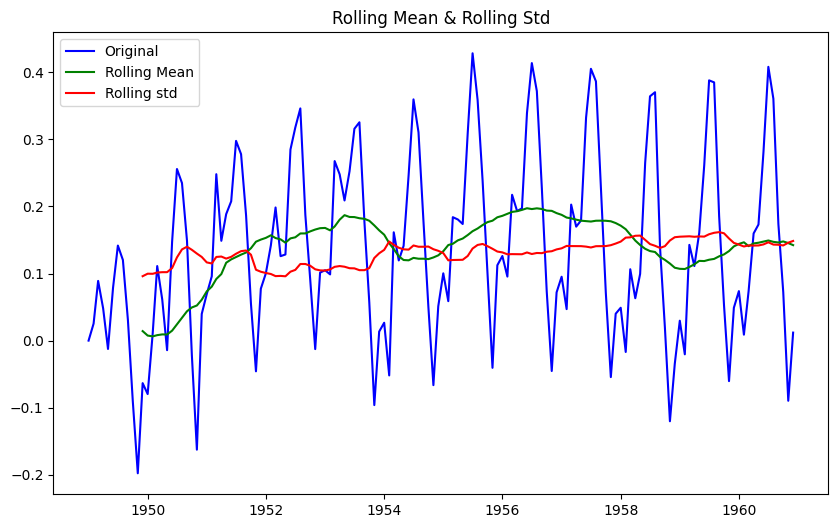

Result of Dickey-fuller test : 
Test statistics                -3.601262
p-value                         0.005737
#Lags used                     13.000000
Number of observation used    130.000000
Critical value (1%)            -3.481682
Critical value (5%)            -2.884042
Critical value (10%)           -2.578770
dtype: float64


In [19]:
#another transformation
df_logscale_minus_movingexponentialdecay_average = indexed_df_logscale - exponential_Decay_weighted_avg
test_stationarity(df_logscale_minus_movingexponentialdecay_average)

Now the data is stationary, now we need to shift the value into time series for foracasting

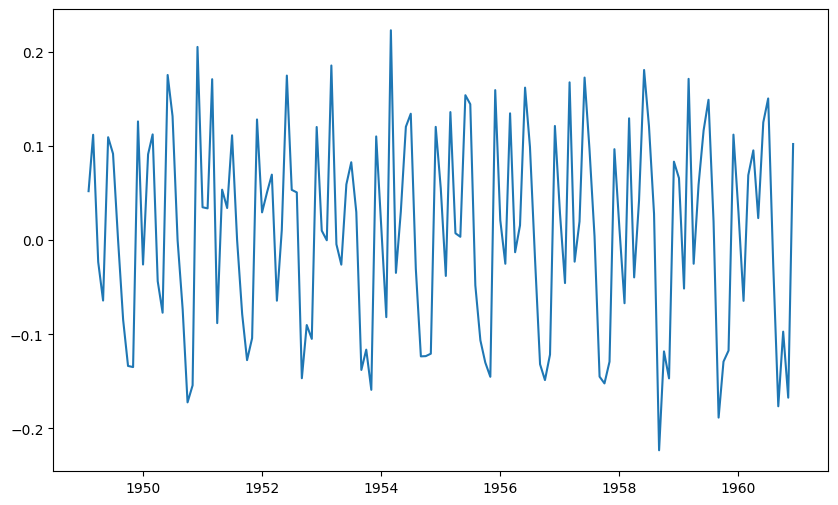

In [20]:
df_logdiff_shifting = indexed_df_logscale - indexed_df_logscale.shift()
plt.plot(df_logdiff_shifting)

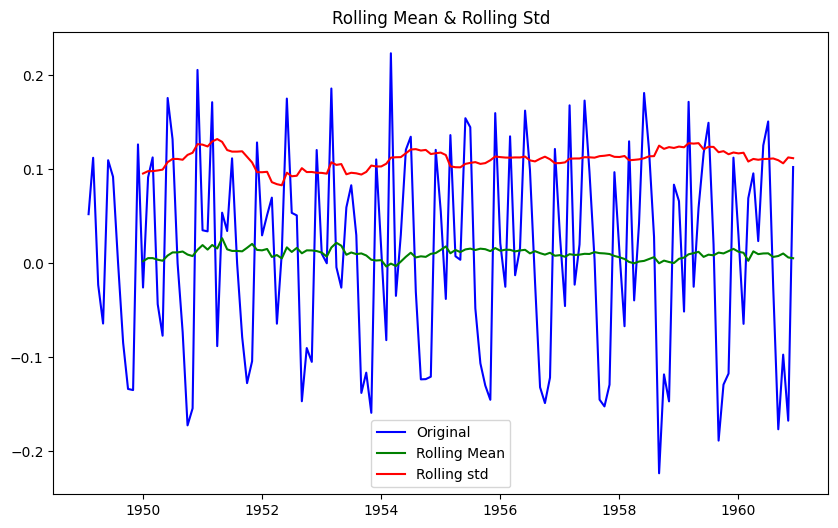

Result of Dickey-fuller test : 
Test statistics                -2.717131
p-value                         0.071121
#Lags used                     14.000000
Number of observation used    128.000000
Critical value (1%)            -3.482501
Critical value (5%)            -2.884398
Critical value (10%)           -2.578960
dtype: float64


In [21]:
df_logdiff_shifting.dropna(inplace=True)
test_stationarity(df_logdiff_shifting)

Time Series is stationary now

work in progress . . .